## Explicación

En este programa se calcula la exactitud de los resultados obtenidos con la simulación, es decir que tan alejados están en promedio de los valores teóricos. Para ello se otendrá el promedio de la desviación de cada S(E,M) experimental respecto al S(E,M). La medida de la desviación estándar será la manera de concluir el grado de exactitud.

# Paquetería necesaria

In [1]:
using PyPlot
using Interact
using LaTeXStrings

# Variables requeridas

In [2]:
function Inicializar_variables(k)
    global L=16
    global caracterizacion = "WL2D_red-cuadrada_L-$(L)_Ising-ferro_cam-10_f-0.0001_sim-$(k)"
    println(caracterizacion)
    global datos_exp
    global cabecera
    datos_exp, cabecera = readdlm("Entropia_2D_final/Entropia_2D_final_$(caracterizacion).txt", header=true)
    global l = size(datos_exp)[1]
    global datos_teo = readdlm("Ising_CnxCn/ising_c$(L)xc$(L).txt")
    datos_teo = hcat(datos_teo[:,2],datos_teo[:,3],log(datos_teo[:,1]))
    datos_teo = datos_teo[1:end-1,:]
    # En caso de que se trate de interacción ferromagnética, se multiplica por -1.
    datos_teo[:,1] = datos_teo[:,1]*(-1);
    #
    datos_teo = sortrows(datos_teo, by=x->(x[1],x[2]));
end

Inicializar_variables (generic function with 1 method)

# Datos de entropía exacta, si la hay

Los archivos de la entropía exacta tienen la siguiente configuración

***1a Columna***: Valor de la entropía

***2a Columna***: Energía

***3a Columna***: Magnetización

### En caso de estudiar modelo de Ising Antiferromagnético:

In [3]:
# En caso de que se trate de interacción antiferromagnética, se multiplica por -1.
datos_teo[:,2] = datos_teo[:,2]*(-1);

LoadError: LoadError: UndefVarError: datos_teo not defined
while loading In[3], in expression starting on line 2

In [4]:
#reordenar por energía(segunda columna) y luego por magnetización (3a columna).
datos_teo = sortrows(datos_teo, by=x->(x[2],x[3]));
#datos_teo = [datos_teo[:,2] datos_teo[:,3] datos_teo[:,1]]

LoadError: LoadError: UndefVarError: datos_teo not defined
while loading In[4], in expression starting on line 2

# Definiendo funciones

## Gráficas de entropía experimental y teórica con animación

In [48]:
function Grafica3d(angle,datos...;rango_x="auto",rango_y="auto")
    fig = figure()
    @manipulate for angle_azim=0:10:360,angle_elev=0:10:90
        withfig(fig) do
            
            for i in 1:length(datos)
                plot3D(datos[i][:,1],datos[i][:,2],datos[i][:,3], ".", alpha=0.2 )
                ax = gca()
                ax[:view_init](elev=angle_elev, azim=angle_azim)
            end
            if rango_x !="auto"
                xlim(rango_x)
            end
            if rango_y !="auto"
                ylim(rango_y)
            end
        end
    end             
end

Grafica3d (generic function with 1 method)

In [6]:
function Animar_grafica3d(x,y,z)
    fig = figure(figsize=(8,6))
    @manipulate for angle=0:10:360
        withfig(fig) do
            Grafica3d(angle,x,y,z)
        end
    end
end 

Animar_grafica3d (generic function with 1 method)

In [7]:
function Grafica3d_teórica(angle,x,y,z)
    plot3D(x, y, log(z), "o", alpha=0.2 )
    ax = gca()
    ax[:view_init](elev=30., azim=angle)
end

Grafica3d_teórica (generic function with 1 method)

In [8]:
function Animar_grafica3d_teórica(x,y,z)
    fig = figure(figsize=(8,6))
    @manipulate for angle=0:10:360
        withfig(fig) do
            Grafica3d_teórica(angle,x,y,z)
        end
    end
end 

Animar_grafica3d_teórica (generic function with 1 method)

### Comparar restando, entropía teórica y entropía experimental

In [126]:
function Compara_entropias(val_teo,val_exp)
    fig = figure()
    @manipulate for angle_azim=0:10:360,angle_elev=0:10:90
        withfig(fig) do
            plot3D(val_teo[:,1], val_teo[:,2], val_exp[:,3]-val_teo[:,3], ".", alpha=0.2 )
            ax = gca()
            ax[:view_init](elev=angle_elev, azim=angle_azim)
        end
    end
end

Compara_entropias (generic function with 1 method)

# Análisis para la entropía simulada

In [42]:
function Desviación_promedio(val_teo, val_exp)
    χ_cuadrada = 0
    diferencia_promedio = 0
    entropia_exacta_min = minimum(val_teo[:,3])
    entropia_simulada_min = minimum(val_exp[:,3])
    diferencia = abs(val_teo[:,3]-val_exp[:,3])
    exactitud = abs((val_exp[:,3]-entropia_simulada_min)-(val_teo[:,3]-entropia_exacta_min))
    for i in 1:l
        χ_cuadrada += (val_teo[i,3]-val_exp[i,3])*(val_teo[i,3]-val_exp[i,3])
    end
    χ_cuadrada = χ_cuadrada./l
    diferencia_promedio = mean(diferencia)
    σ = std(diferencia)
    exactitud_promedio = mean(exactitud)
    return χ_cuadrada, diferencia_promedio, σ, exactitud_promedio
end

Desviación_promedio (generic function with 1 method)

In [6]:
function Entropia_promedio(datos...)
    número_de_repeticiones = length(datos)/4.
    entropia_promedio = zeros(l,4)
    entorpia_promedio[:,1] = datos[1][:,1]
    entorpia_promedio[:,2] = datos[1][:,2]
    for i in 1:l
        entropia_promedio[:,3] = mean([datos[j][l,4] for j in 1:número_de_repeticiones])
        entropia_promedio[:,4] = mean([datos[j][l,4] for j in 1:número_de_repeticiones])
    end
end

Entropia_promedio (generic function with 1 method)

# Aquí acaban las funciones

In [11]:
Inicializar_variables(16)

WL2D_cuadrada_L_16_Is_ferr_cam_10_f_0.0001


29430x3 Array{Float64,2}:
 -512.0  -256.0   0.0     
 -512.0   256.0   0.0     
 -504.0  -254.0   5.54518 
 -504.0   254.0   5.54518 
 -500.0  -252.0   6.23832 
 -500.0   252.0   6.23832 
 -496.0  -252.0  10.3775  
 -496.0  -250.0   7.33694 
 -496.0  -248.0   5.54518 
 -496.0   248.0   5.54518 
 -496.0   250.0   7.33694 
 -496.0   252.0  10.3775  
 -492.0  -250.0  11.7518  
    ⋮                     
  492.0     0.0   9.01091 
  492.0     2.0  11.7678  
  492.0     4.0   6.93147 
  496.0    -4.0   9.69622 
  496.0    -2.0   7.33694 
  496.0     0.0  10.3815  
  496.0     2.0   7.33694 
  496.0     4.0   9.69622 
  500.0     0.0   6.93147 
  504.0    -2.0   5.54518 
  504.0     2.0   5.54518 
  512.0     0.0   0.693147

Interact.Slider{Int64}(Signal{Int64}(180, nactions=0),"angle_azim",180,0:10:360,true)

Interact.Slider{Int64}(Signal{Int64}(40, nactions=0),"angle_elev",40,0:10:90,true)

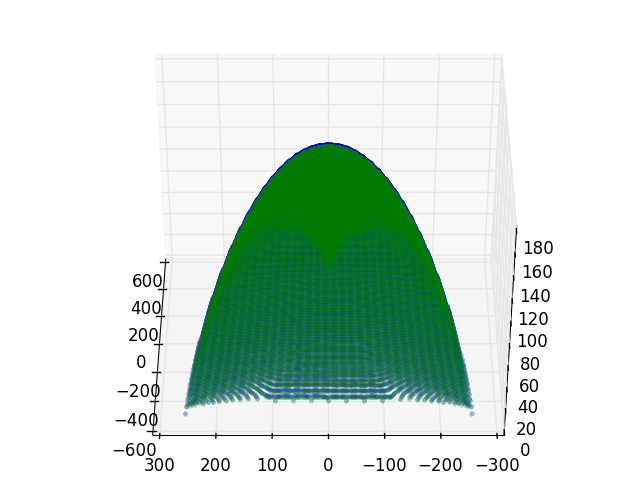

In [49]:
Grafica3d(30,datos_exp,datos_teo)

In [43]:
Desviación_promedio(datos_teo, datos_exp)

(1.9974071974580696,1.4043575101666488,0.15870739415426274,0.4139147604076271)

Interact.Slider{Int64}(Signal{Int64}(180, nactions=0),"angle_azim",180,0:10:360,true)

Interact.Slider{Int64}(Signal{Int64}(40, nactions=0),"angle_elev",40,0:10:90,true)

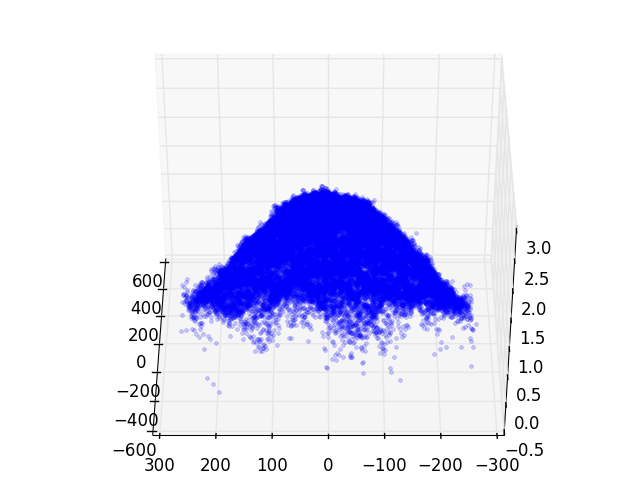

In [127]:
Compara_entropias(datos_teo,datos_exp)